# Data Analysis Project: E-Commerce Public Dataset
- **Name:** Muhammad Akbar Hamid
- **Email:** muhakbarhamid21@gmail.com
- **ID Dicoding:** muhakbarhamid21

## Defining Business Questions

1. **Which product categories have the highest and lowest sales volumes?**  
   This question aims to identify the top-performing product categories, as well as those that are underperforming in terms of sales volume, to guide inventory and marketing strategies.

2. **What are the monthly sales trends, and how have they evolved over time?**  
   This question focuses on analyzing the overall performance of monthly sales, allowing for the identification of seasonal patterns or other fluctuations over time.

3. **RFM Analysis**:
   - **When did customers last make a transaction, and what does this tell us about customer recency?**  
     This will help determine how recently customers have engaged with the business and identify those who may require re-engagement.

   - **How frequently are customers making purchases within recent months?**  
     This explores customer purchase frequency, allowing for the identification of repeat buyers and the overall engagement level of the customer base.

   - **Which are the top 5 customers in terms of monetary value spent in recent months?**  
     This question highlights the most valuable customers based on their total spending, aiding in loyalty programs or targeted marketing efforts.

4. **Which states have the highest and lowest total sales, and what regional patterns can be identified?**  
   This geographic analysis will reveal which regions are contributing the most to sales revenue and which areas may require more focus.

5. **What is the relationship between product pricing, shipping costs, and customer review scores?**  
   Through clustering analysis, this question seeks to understand how product price and shipping cost impact customer satisfaction, as reflected in review scores, to optimize pricing strategies and improve customer experience.

## Import All Packages/Libraries Used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
product_category_df =pd.read_csv('data/product_category_name_translation.csv')
products_df = pd.read_csv('data/products_dataset.csv')
sellers_df = pd.read_csv('data/sellers_dataset.csv')

### Assessing Data

#### Assess `customer` Dataset

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
print('Number of duplicates: ', customers_df.duplicated().sum())

Number of duplicates:  0


In [5]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Assess `geolocation` Dataset

In [6]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [7]:
duplicated_geo = geolocation_df.duplicated().sum()
print('Number of duplicates: ', duplicated_geo)

Number of duplicates:  261831


In [8]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Assess `order_items` Dataset

In [9]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
order_items_df = order_items_df.drop('shipping_limit_date', axis=1)

In [11]:
print('Number of duplicates: ', order_items_df.duplicated().sum())

Number of duplicates:  0


In [12]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Assess `order_payments` Dataset

In [13]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [14]:
print('Number of duplicates: ', order_payments_df.duplicated().sum())

Number of duplicates:  0


In [15]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Assess `order_reviews` Dataset

In [16]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
order_reviews_df = order_reviews_df.drop(['review_creation_date','review_answer_timestamp', 'review_comment_title', 'review_comment_message'], axis=1)

In [18]:
order_reviews_df.isna().sum()

review_id       0
order_id        0
review_score    0
dtype: int64

In [19]:
print('Number of duplicates:', order_reviews_df.duplicated().sum())

Number of duplicates: 0


In [20]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Assess `orders` Dataset

In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [22]:
orders_df.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [23]:
orders_df = orders_df.loc[orders_df['order_status'] != 'unavailable']
orders_df = orders_df.loc[orders_df['order_status'] != 'canceled']

In [24]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      624
order_delivered_customer_date    1737
order_estimated_delivery_date       0
dtype: int64

In [25]:
print('Number of duplicates: ', orders_df.duplicated().sum())

Number of duplicates:  0


In [26]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,98207,98207,98207,98207,98188,97583,96470,98207
unique,98207,98207,6,97655,89760,80951,95658,447
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,514


#### Assess `product_category_name_translation` Dataset

In [27]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [28]:
print('Number of duplicates: ', product_category_df.duplicated().sum())

Number of duplicates:  0


#### Assess `product` Dataset

In [29]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [30]:
products_df = products_df[['product_id','product_category_name']]

In [31]:
products_df.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

In [32]:
print('Number of duplicates: ', products_df.duplicated().sum())

Number of duplicates:  0


In [33]:
products_df.describe()

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


#### Assess `sellers` Dataset

In [34]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [35]:
print('Number of duplicates: ', sellers_df.duplicated().sum())

Number of duplicates:  0


### Cleaning Data

#### Remove Duplicates

The dataset that has duplicate data is only found in the `geolocation` dataset.

In [36]:
geolocation_df.drop_duplicates(inplace=True)

In [37]:
print('Current Duplicate Count: ', geolocation_df.duplicated().sum())

Current Duplicate Count:  0


#### Change Data Type

The dataset contains incorrect data types in the following columns:
- `orders_df`: The columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` are currently not in the correct format. These columns should be converted to the datetime data type for proper handling of time-based operations and analysis.

In [38]:
date_time = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in date_time:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [39]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98207 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.7+ MB


It can be observed that the columns `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, and `order_estimated_delivery_date` now have the correct data type, which is **datetime**.

#### View Inaccuracy Data in **datetime**

The order of events is as follows:
`order_purchase_timestamp` < `order_approved_at` < `order_delivered_carrier_date` < `order_delivered_customer_date`, and `order_delivered_carrier_date` < `order_estimated_delivery_date`.

In [40]:
wrong_order = orders_df[
    (orders_df['order_purchase_timestamp'] > orders_df['order_approved_at']) |
    (orders_df['order_approved_at'] > orders_df['order_delivered_carrier_date']) |
    (orders_df['order_delivered_carrier_date'] > orders_df['order_delivered_customer_date'])|
    (orders_df['order_delivered_carrier_date'] > orders_df['order_estimated_delivery_date'])
]
wrong_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15
102,a5474c0071dd5d1074e12d417078bbd0,ef15b3240b2083e0487762ee2978d2b8,delivered,2018-07-30 22:41:44,2018-08-01 02:50:15,2018-08-02 10:35:00,2018-08-03 19:28:47,2018-08-02
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
...,...,...,...,...,...,...,...,...
99091,240ead1a7284667e0ec71d01f80e4d5e,fcdd7556401aaa1c980f8b67a69f95dc,delivered,2018-07-02 16:30:02,2018-07-05 16:17:59,2018-07-05 14:11:00,2018-07-10 23:21:47,2018-07-24
99230,78008d03bd8ef7fcf1568728b316553c,043e3254e68daf7256bda1c9c03c2286,delivered,2018-07-03 13:11:13,2018-07-05 16:32:52,2018-07-03 12:57:00,2018-07-10 17:47:39,2018-07-23
99266,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02
99377,a6bd1f93b7ff72cc348ca07f38ec4bee,6d63fa86bd2f62908ad328325799152f,delivered,2018-04-20 17:28:40,2018-04-24 19:26:10,2018-04-23 17:18:40,2018-04-28 17:38:42,2018-05-15


There are numerous incorrect data entries. As a solution, the incorrect values will be replaced with the previous datetime values from the respective order.

For example, if there is an error in the `order_approved_at` column, the value will be replaced with the data from `order_purchase_timestamp`.

In [41]:
orders_df.loc[orders_df['order_purchase_timestamp'] > orders_df['order_approved_at'], 'order_approved_at'] = orders_df['order_purchase_timestamp']
orders_df.loc[orders_df['order_approved_at'] > orders_df['order_delivered_carrier_date'], 'order_delivered_carrier_date'] = orders_df['order_approved_at']
orders_df.loc[orders_df['order_delivered_carrier_date'] > orders_df['order_delivered_customer_date'], 'order_delivered_customer_date'] = orders_df['order_delivered_carrier_date']
orders_df.loc[orders_df['order_delivered_carrier_date'] > orders_df['order_estimated_delivery_date'], 'order_estimated_delivery_date'] = orders_df['order_delivered_carrier_date']

In [42]:
wrong_order = orders_df[
    (orders_df['order_purchase_timestamp'] > orders_df['order_approved_at']) |
    (orders_df['order_approved_at'] > orders_df['order_delivered_carrier_date']) |
    (orders_df['order_delivered_carrier_date'] > orders_df['order_delivered_customer_date'])|
    (orders_df['order_delivered_carrier_date'] > orders_df['order_estimated_delivery_date'])
]
wrong_order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


The incorrect data has been resolved and is no longer present.

#### Handling Missing Value

Several datasets contain missing values:

- `orders` dataset: Missing values are found in the columns `order_approved_at`, `order_delivered_carrier_date`, and `order_delivered_customer_date`.
- `products` dataset: The column `product_category_name_id` has missing values.

These missing values should be addressed to ensure data quality and accuracy in the analysis.


In [43]:
# dataset `order`
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  19
order_delivered_carrier_date      624
order_delivered_customer_date    1737
order_estimated_delivery_date       0
dtype: int64

The missing values will be filled using the values from the preceding column.

In [44]:
orders_df.loc[orders_df['order_approved_at'].isna(), 'order_approved_at'] = orders_df['order_purchase_timestamp']
orders_df.loc[orders_df['order_delivered_carrier_date'].isna(), 'order_delivered_carrier_date'] = orders_df['order_approved_at']
orders_df.loc[orders_df['order_delivered_customer_date'].isna(), 'order_delivered_customer_date'] = orders_df['order_delivered_carrier_date']

In [45]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

The data is now clean, with no missing values remaining.

In [46]:
# dataset `product`
products_df.isna().sum()

product_id                 0
product_category_name    610
dtype: int64

Based on this dataset, the missing values cannot be filled (since category names must be accurate). Therefore, all rows containing missing values will be removed.

In [47]:
products_df = products_df.dropna()

In [48]:
products_df.isna().sum()

product_id               0
product_category_name    0
dtype: int64

The data is now clean, with no missing values remaining.

#### Fix Inaccuracy Value or Outliers

##### Dataset `order_items`

1. Outlier detection will be performed on the `price` and `freight_value` columns.
2. A merge between `products_df` and `product_category_df` will be done to retrieve the product names in English, resulting in `products_in_english_df`.
3. A merge between `order_items_df` and `products_in_english_df` will be conducted to determine whether the data points are truly outliers, resulting in `order_items_product_df`.

In [49]:
order_items_df.nlargest(5, 'price')

,order_id,order_item_id,product_id,seller_id,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.0,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,4799.0,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,4690.0,74.34


It can be observed that many data points have high prices. Let's now check for the lowest prices.

In [50]:
order_items_df.nsmallest(5, 'price')

,order_id,order_item_id,product_id,seller_id,price,freight_value
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,22.30
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.20,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89


It cannot yet be confirmed whether the data are outliers, as there may be genuinely expensive products. A merge with the product information will be performed to verify this.

In [51]:
products_in_english_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [52]:
order_items_product_df = pd.merge(
    left=order_items_df,
    right=products_in_english_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
descending_order_products = order_items_product_df.sort_values(by='price', ascending=False)
descending_order_products.head()

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.0,194.31,utilidades_domesticas,housewares
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.0,193.21,pcs,computers
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.0,227.66,artes,art
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,4799.0,151.34,eletroportateis,small_appliances
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,4690.0,74.34,eletroportateis,small_appliances


In [53]:
ascending_order_products = order_items_product_df.sort_values(by='price', ascending=True)
ascending_order_products.head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23,construcao_ferramentas_construcao,construction_tools_construction
87081,c5bdd8ef3c0ec420232e668302179113,2,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,22.30,construcao_ferramentas_construcao,construction_tools_construction
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,0.85,18.23,construcao_ferramentas_construcao,construction_tools_construction
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty
57307,8272b63d03f5f79c56e9e4120aec44ef,11,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,1.20,7.89,beleza_saude,health_beauty


It can be observed that there are no outliers in the `order_items` data for both `price` and `freight_value`. The high `freight_value` may be due to long shipping distances. As for the `order_item_id` column, since there are many product items, there are naturally multiple `order_item_id` values.

##### Dataset `order_payment`

1. To check for outliers in the `payment_value`, `payment_sequential`, and `payment_installments` columns, a merge will be performed on `order_items_product_df`, resulting in `order_payments_items_products_df`.
2. The outliers are mainly caused by duplicate `order_id values`, so those with the same `order_id` need to be consolidated, resulting in `result_order_payments_items_product_df`.

In [54]:
order_payments_df.nlargest(5, 'payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


In [55]:
order_payments_items_products_df = pd.merge(
    left=order_items_product_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [56]:
descending_order_payments = order_payments_items_products_df.sort_values(by='payment_value', ascending=False)
descending_order_payments.head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
1697,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1696,03caa2c082116e1d31e67e9ae3700499,7,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1690,03caa2c082116e1d31e67e9ae3700499,1,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1691,03caa2c082116e1d31e67e9ae3700499,2,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1692,03caa2c082116e1d31e67e9ae3700499,3,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1693,03caa2c082116e1d31e67e9ae3700499,4,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1694,03caa2c082116e1d31e67e9ae3700499,5,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
1695,03caa2c082116e1d31e67e9ae3700499,6,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.0,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
53155,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,1790.0,28.72,telefonia_fixa,fixed_telephony,1.0,boleto,1.0,7274.88
53152,736e1922ae60d0d6a89247b851902527,1,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,1790.0,28.72,telefonia_fixa,fixed_telephony,1.0,boleto,1.0,7274.88


Jika dilihat dari order_id, kemungkinan dengan payment_value sebesar itu dikarenakan membeli dengan jumlah yang banyak.

In [57]:
order_payments_items_products_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
count,117604,117604.000000,117604,117604,117604.000000,117604.000000,115906,115881,117601.000000,117601,117601.000000,117601.000000
unique,98666,NaN,32951,3095,NaN,NaN,73,71,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,cama_mesa_banho,bed_bath_table,NaN,credit_card,NaN,NaN
freq,63,NaN,536,2133,NaN,NaN,11823,11823,NaN,86769,NaN,NaN
mean,NaN,1.195920,NaN,NaN,120.822849,20.045551,NaN,NaN,1.093528,NaN,2.939482,172.686752
std,NaN,0.697721,NaN,NaN,184.477367,15.861351,NaN,NaN,0.726692,NaN,2.774223,267.592290
min,NaN,1.000000,NaN,NaN,0.850000,0.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,39.900000,13.080000,NaN,NaN,1.000000,NaN,1.000000,60.870000
50%,NaN,1.000000,NaN,NaN,74.900000,16.290000,NaN,NaN,1.000000,NaN,2.000000,108.210000
75%,NaN,1.000000,NaN,NaN,134.900000,21.190000,NaN,NaN,1.000000,NaN,4.000000,189.260000


Dapat dilihat bahwa adanya perbedaan antara banyaknya order_id dengan value yang unique pada order_id. Maka, kita harus:
1. Mengganti order_item_id dengan order_item dan mengambil nilai maksimalnya.
2. Menyatukan semua order_id yang sama

In [58]:
result_order_payments_items_products_df = order_payments_items_products_df.loc[order_payments_items_products_df.groupby('order_id')['order_item_id'].idxmax()]

In [59]:
result_order_payments_items_products_df.sort_values(by='payment_value', ascending=False).head(10)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
1697,03caa2c082116e1d31e67e9ae3700499,8,5769ef0a239114ac3a854af00df129e4,b37c4c02bda3161a7546a4e6d222d5b2,1680.00,28.01,telefonia_fixa,fixed_telephony,1.0,credit_card,1.0,13664.08
53155,736e1922ae60d0d6a89247b851902527,4,19936fa4f614ee0590d3b77ac83fd648,b37c4c02bda3161a7546a4e6d222d5b2,1790.00,28.72,telefonia_fixa,fixed_telephony,1.0,boleto,1.0,7274.88
3669,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,6735.00,194.31,utilidades_domesticas,housewares,1.0,credit_card,8.0,6929.31
117164,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,193.21,pcs,computers,1.0,boleto,1.0,6922.21
112537,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,6499.00,227.66,artes,art,1.0,boleto,1.0,6726.66
20411,2cc9089445046817a7539d90805e6e5a,6,c183fd5d2abf05873fa6e1014ed9e06c,f08a5b9dd6767129688d001acafc21e5,989.10,24.49,agro_industria_e_comercio,agro_industry_and_commerce,1.0,boleto,1.0,6081.54
77662,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,4799.00,151.34,eletroportateis,small_appliances,1.0,credit_card,10.0,4950.34
83002,b4c4b76c642808cbe472a32b86cddc95,2,3db0b74faf0d26a6b252528659d6b849,c4f7fee5b0db50e87766f5a4d1b1b758,2299.95,104.77,cool_stuff,cool_stuff,1.0,credit_card,5.0,4809.44
11716,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,4690.00,74.34,eletroportateis,small_appliances,1.0,credit_card,8.0,4764.34
64931,8dbc85d1447242f3b127dda390d56e19,1,259037a6a41845e455183f89c5035f18,c72de06d72748d1a0dfb2125be43ba63,4590.00,91.78,pcs,computers,1.0,credit_card,8.0,4681.78


**Kesimpulan:**
Problem masalah terselesaikan. Payment_value yang tinggi disebabkan karena order_id yang menumpuk.

In [60]:
# Berdasarkan Payment sequential
result_order_payments_items_products_df['payment_sequential'].unique()

array([ 1.,  2.,  5.,  3.,  7.,  6.,  4.,  8., 10., 14., 17.,  9., nan,
       19., 11., 27., 15.])

Ternyata terdapat missing value. Hal ini dapat disebabkan karena penggabungan dataset (merge). Caranya adalah, kita akan menghapus semua missing value

In [61]:
result_order_payments_items_products_df.isna().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name            1418
product_category_name_english    1440
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
dtype: int64

In [62]:
result_order_payments_items_products_df.dropna(inplace=True)
result_order_payments_items_products_df.isna().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

Sudah tidak terdapat missing value.

In [63]:
result_order_payments_items_products_df.sort_values(by='payment_sequential', ascending=False)

,order_id,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
114980,fa65dad1b0e818e3ccc5cb0e39231352,1,1aecdb5fa3add74e385f25c6c527a462,06532f10282704ef4c69168b914b77be,392.55,65.44,ferramentas_jardim,garden_tools,27.0,voucher,1.0,66.02
94177,ccf804e764ed5650cd8759557269dc13,1,8d37ee446981d3790967d0268d6cfc81,1900267e848ceeba8fa32d80c1a5f5a8,49.99,12.69,cama_mesa_banho,bed_bath_table,19.0,voucher,1.0,1.68
63021,895ab968e7bb0d5659d16cd74cd1650c,3,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,housewares,17.0,voucher,1.0,16.70
117085,fedcd9f7ccdc8cba3a18defedd1a5547,2,0554911df28fda9fd668ce5ba5949695,7c67e1448b00f6e969d365cea6b010ab,79.99,22.88,moveis_escritorio,office_furniture,15.0,voucher,1.0,10.66
18402,285c2e15bebd4ac83635ccc563dc71f4,1,bdc3291ab242ec1effc8eb0987850268,dbd66278cbfe1aa1000f90a217ca4695,29.00,11.85,eletronicos,electronics,14.0,voucher,1.0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...
39802,56203d7ad8ce86a53281778d2dd2c9b7,1,e0d64dcfaa3b6db5c54ca298ae101d05,7e93a43ef30c4f03f38b393420bc753a,255.61,28.05,relogios_presentes,watches_gifts,1.0,credit_card,8.0,283.66
39801,56203ab8c919f019d69bac51794e296d,2,fd0f7402731790468090d7895cf61c0f,4e17c65a516f69d023a2ae78b84f28d6,69.90,15.21,perfumaria,perfumery,1.0,credit_card,10.0,163.22
39799,561f746a88df51356713157ec83fd020,2,01d4157fd9738ea81038316ae4cfc192,7ad32824caee82087b3e2e5f33b1bf32,56.00,12.83,cama_mesa_banho,bed_bath_table,1.0,credit_card,5.0,137.66
39797,561f47f3e381d23b5ba7853460adf093,1,da0bb22eb8eb2bce31a3784570528efb,3d871de0142ce09b7081e2b9d1733cb1,79.00,38.10,papelaria,stationery,1.0,credit_card,2.0,117.10


**Kesimpulan:**

Payment_sequential yang tinggi kemungkinan karena proses pembayaran atau urutan pembayarannya yang terbilang cukup banyak. Dan untuk payment_installment (pembayaran cicilan) tergantung dari kesepakatan awal pembelian. Jadi tidak mempengaruhi data outlier atau inaccuracy data jika < 100.

## Exploratory Data Analysis (EDA)

### Exploration of all the `orders` Dataset with the `products` Dataset

#### Merging The `orders` Dataset

In [64]:
orders_item_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)
orders_payment_df = pd.merge(
    left=orders_item_df,
    right=order_payments_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

all_orders_df = pd.merge(
    left=orders_payment_df,
    right=order_reviews_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [65]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117741 entries, 0 to 117740
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117741 non-null  object        
 1   customer_id                    117741 non-null  object        
 2   order_status                   117741 non-null  object        
 3   order_purchase_timestamp       117741 non-null  datetime64[ns]
 4   order_approved_at              117741 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117741 non-null  datetime64[ns]
 6   order_delivered_customer_date  117741 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117741 non-null  datetime64[ns]
 8   order_item_id                  117733 non-null  float64       
 9   product_id                     117733 non-null  object        
 10  seller_id                      117733 non-null  object        
 11  

Due to the merging of datasets, a significant number of missing values may arise. It is essential to handle and clean these missing values to ensure data quality and accuracy for further analysis.

In [66]:
all_orders_df.isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      8
product_id                         8
seller_id                          8
price                              8
freight_value                      8
payment_sequential                 3
payment_type                       3
payment_installments               3
payment_value                      3
review_id                        963
review_score                     963
dtype: int64

In [67]:
all_orders_df.dropna(inplace=True)

In [68]:
all_orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
dtype: int64

In [69]:
all_orders_df = all_orders_df.loc[all_orders_df.groupby('order_id')['order_item_id'].idxmax()]

Then, since we have already replaced the `order_item_id` with the largest `order_item_id`, rename it to `sum_order`.

In [70]:
all_orders_df.rename(columns={'order_item_id': 'qty_order'}, inplace=True)
all_orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,qty_order,product_id,seller_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
100791,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5.0
84943,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4.0
7382,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5.0
26645,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,1.0,credit_card,2.0,25.78,f4028d019cb58564807486a6aaf33817,4.0
6141,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,18.14,1.0,credit_card,3.0,218.04,940144190dcba6351888cafa43f3a3a5,5.0


#### Merging The `products` Dataset

In [71]:
products_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [72]:
products_df.isna().sum()

product_id                        0
product_category_name             0
product_category_name_english    13
dtype: int64

In [73]:
products_df.dropna(inplace=True)

#### Merging The `orders` Dataset and The `products` Dataset

In [74]:
orders_products_df = pd.merge(
    left=all_orders_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [75]:
orders_products_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
qty_order                           0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
product_category_name            1414
product_category_name_english    1414
dtype: int64

Missing values have occurred due to the merging of datasets. These missing values will be removed to ensure data integrity for further analysis.

In [76]:
orders_products_df.dropna(inplace=True)

In [77]:
orders_products_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
qty_order                        0
product_id                       0
seller_id                        0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
product_category_name            0
product_category_name_english    0
dtype: int64

#### Identifying Which Products Have The Highest and Lowest Review Scores.

In [78]:
orders_products_df.groupby(by='product_category_name_english').agg({
    'product_id':'nunique',
    'qty_order':'sum',
    'review_score':'mean'
}).sort_values(by=['review_score','qty_order'], ascending=False)

,product_id,qty_order,review_score
product_category_name_english,,,
cds_dvds_musicals,1,14.0,4.666667
flowers,14,29.0,4.538462
books_general_interest,205,543.0,4.503006
costruction_tools_tools,39,99.0,4.425532
books_technical,122,262.0,4.421260
...,...,...,...
furniture_mattress_and_upholstery,10,38.0,3.815789
fashion_male_clothing,83,129.0,3.752294
fashio_female_clothing,25,47.0,3.736842


It can be observed that:
- The highest review score is for the cds_dvds_musicals category, with a score of 4.6. This category has a total of 46 orders, but only consists of 1 product type.
- The lowest review score is for the security_and_services category, with a score of 5. This category has a total of 2 orders and includes 2 different product types.

This highlights a significant difference in both review scores and order volumes between the two categories.

#### Examining The Time Intervals

- The time interval between when the order was placed and when it was approved.
- The time interval from approval to handing over to the shipping service.
- The shipping duration.
- The time interval between the estimated delivery date and the actual delivery to the customer.
- The time interval from the order placement date to the actual delivery to the customer.

In [79]:
orders_products_df.order_status.unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved'],
      dtype=object)

In [80]:
orders_products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96052 entries, 0 to 97465
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96052 non-null  object        
 1   customer_id                    96052 non-null  object        
 2   order_status                   96052 non-null  object        
 3   order_purchase_timestamp       96052 non-null  datetime64[ns]
 4   order_approved_at              96052 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96052 non-null  datetime64[ns]
 6   order_delivered_customer_date  96052 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96052 non-null  datetime64[ns]
 8   qty_order                      96052 non-null  float64       
 9   product_id                     96052 non-null  object        
 10  seller_id                      96052 non-null  object        
 11  price          

In [81]:
# time interval between order placement and approval
orders_products_copy = orders_products_df.copy()
apply_time = orders_products_copy['order_approved_at'] - orders_products_copy['order_purchase_timestamp']
apply_time = apply_time.apply(lambda x: x.total_seconds())
orders_products_df['apply_time'] = round(apply_time/86400)

In [82]:
# time interval from approval to handover to the shipping service
shipped_time = orders_products_copy.loc[orders_products_copy['order_status'] != 'created']
shipped_time = shipped_time['order_delivered_carrier_date'] - shipped_time['order_approved_at']
shipped_time = shipped_time.apply(lambda x: x.total_seconds())
orders_products_df['shipped_time'] = round(shipped_time/86400)

In [83]:
# shipping time interval
customer_gets_order = orders_products_copy.loc[~orders_products_copy['order_status'].isin(['created', 'processing', 'approved', 'invoiced'])]
customer_gets_order = customer_gets_order['order_delivered_customer_date'] - customer_gets_order['order_delivered_carrier_date']
customer_gets_order = customer_gets_order.apply(lambda x: x.total_seconds())
orders_products_df['customer_gets_order'] = round(customer_gets_order/86400)

In [84]:
# time interval between the estimated delivery and actual delivery to the customer
estimated_range = orders_products_copy.loc[~orders_products_copy['order_status'].isin(['created', 'processing', 'approved', 'invoiced'])]
estimed_range = estimated_range['order_estimated_delivery_date'] - estimated_range['order_delivered_carrier_date']
estimed_range = estimed_range.apply(lambda x: x.total_seconds())
orders_products_df['estimated_range'] = round(estimed_range/86400)

In [85]:
# time interval from the order date to the delivery to the customer
range_order = orders_products_copy['order_delivered_customer_date'] - orders_products_copy['order_purchase_timestamp']
range_order = range_order.apply(lambda x: x.total_seconds())
orders_products_df['range_order'] = round(range_order/86400)

In [86]:
orders_products_df.agg({
    'apply_time':['mean', 'min', 'max'],
    'shipped_time':['mean', 'min', 'max'],
    'customer_gets_order':['mean', 'min', 'max'],
    'estimated_range':['mean','min','max'],
    'range_order':['mean', 'min', 'max']
})

,apply_time,shipped_time,customer_gets_order,estimated_range,range_order
mean,0.423083,2.789354,9.148929,20.383018,12.309145
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,60.000000,107.000000,205.000000,148.000000,208.000000


**Conclusion:**
- The time interval between order placement and approval ranges from 0 to 60 days, with an average of less than 1 day (0.23 days).
- The time interval from approval to handover to the shipping service ranges from 0 to 107 days, with an average of 2-3 days (7.883 days).
- The shipping time interval ranges from 0 to 205 days, with an average of 9 days (9.14 days).
- The time interval between the estimated delivery and when the order reaches the customer ranges from 0 to 148 days, with an average estimated delivery time of 20-21 days (20.42 days).
- The time interval from the order date to the delivery to the customer ranges from 0 to 208 days (0 likely due to orders being canceled or input errors that have been corrected), with an average of 12 days (12.30 days).

#### Analyzing The Rating Based on The Number of Orders

In [87]:
orders_products_df.order_status.unique()

array(['delivered', 'shipped', 'invoiced', 'processing', 'approved'],
      dtype=object)

In [88]:
orders_products_df.groupby(by='review_score').agg({
    'qty_order': 'sum',
    'product_category_name_english': 'unique',
    'payment_value': ['min', 'max']
}).sort_values(('qty_order', 'sum'), ascending=False)

qty_order                      product_category_name_english  \
                   sum                                             unique   
review_score                                                                
5.0            62284.0  [cool_stuff, furniture_decor, garden_tools, he...   
4.0            20887.0  [pet_shop, perfumery, housewares, telephony, b...   
1.0            13438.0  [health_beauty, perfumery, bed_bath_table, com...   
3.0             9227.0  [cool_stuff, bed_bath_table, telephony, perfum...   
2.0             3742.0  [furniture_decor, bed_bath_table, office_furni...   

             payment_value            
                       min       max  
review_score                          
5.0                   0.01   6929.31  
4.0                   0.01   4764.34  
1.0                   0.09  13664.08  
3.0                   0.44   3242.84  
2.0                   0.17   3358.24

It can be observed that there are 62,284 orders with a rating of 5, 20,887 orders with a rating of 4, and 13,438 orders with a rating of 1. This indicates a need for evaluation and improvement in products under the product_category_name_english that received a rating of 1. Addressing these issues is crucial to prevent further customer dissatisfaction and to avoid lowering the overall rating of these products in the future.

### Merging The `customers` Dataset

Renaming the columns customer_zip_code_prefix and geolocation_zip_code_prefix to zip_code_prefix.

In [89]:
geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)
customers_df.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [90]:
customers_df = pd.merge(
    left=customers_df,
    right=geolocation_df,
    how='left',
    left_on='zip_code_prefix',
    right_on='zip_code_prefix'
)

In [91]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328006 entries, 0 to 10328005
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   customer_id         object 
 1   customer_unique_id  object 
 2   zip_code_prefix     int64  
 3   customer_city       object 
 4   customer_state      object 
 5   geolocation_lat     float64
 6   geolocation_lng     float64
 7   geolocation_city    object 
 8   geolocation_state   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 788.0+ MB


In [92]:
customers_df.isna().sum()

customer_id             0
customer_unique_id      0
zip_code_prefix         0
customer_city           0
customer_state          0
geolocation_lat       278
geolocation_lng       278
geolocation_city      278
geolocation_state     278
dtype: int64

In [93]:
customers_df.dropna()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP
...,...,...,...,...,...,...,...,...,...
10328001,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.598092,-46.904582,cotia,SP
10328002,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594171,-46.908091,cotia,SP
10328003,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.599369,-46.905603,cotia,SP
10328004,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.584425,-46.892014,cotia,SP


In [94]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,10328006,10328006,1.032801e+07,10328006,10328006,1.032773e+07,1.032773e+07,10327728,10327728
unique,99441,96096,NaN,4119,27,NaN,NaN,5812,27
top,b71d37b2430a0b3e0bb74cb6e7d52c3c,31d332d20895c5c0baefe55207a0fead,NaN,rio de janeiro,SP,NaN,NaN,rio de janeiro,SP
freq,779,2181,NaN,940474,3878942,NaN,NaN,940421,3878907
mean,NaN,NaN,3.428918e+04,NaN,NaN,-2.181000e+01,-4.612746e+01,NaN,NaN
std,NaN,NaN,2.741553e+04,NaN,NaN,4.464366e+00,3.644221e+00,NaN,NaN
min,NaN,NaN,1.003000e+03,NaN,NaN,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,NaN,NaN,1.329000e+04,NaN,NaN,-2.357275e+01,-4.797750e+01,NaN,NaN
50%,NaN,NaN,2.625500e+04,NaN,NaN,-2.288202e+01,-4.651987e+01,NaN,NaN
75%,NaN,NaN,3.874000e+04,NaN,NaN,-2.026162e+01,-4.346700e+01,NaN,NaN


It can be observed that the customer_id and customer_unique_id should have the same values for both count and unique entries. This means there are duplicate customer_id entries. We will retain only one customer_id for each unique value.

In [95]:
drop_duplicates = customers_df.drop_duplicates('customer_id', keep='first')
customers_df = pd.concat([ 
    drop_duplicates, customers_df[~customers_df.duplicated('customer_id', keep=False)]
])
customers_df = customers_df.reset_index(drop=True)

In [96]:
customers_df = customers_df.drop_duplicates(subset='customer_id', keep='first').reset_index(drop=True)

In [97]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,99441,99441,99441.000000,99441,99441,99163.000000,99163.000000,99163,99163
unique,99441,96096,NaN,4119,27,NaN,NaN,4200,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP,NaN,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746,NaN,NaN,13207,41731
mean,NaN,NaN,35137.474583,NaN,NaN,-21.192930,-46.176190,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN,5.620584,4.066202,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN,-36.605374,-72.666706,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN,-23.588296,-48.096342,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN,-22.926905,-46.630764,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN,-20.146615,-43.602775,NaN,NaN


### Merging The `sellers` Dataset

Renaming the seller_zip_code_prefix column, then merging it.

In [98]:
sellers_df.rename(columns={'seller_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

In [99]:
sellers_df = pd.merge(
    left=sellers_df,
    right=geolocation_df,
    how='left',
    left_on='zip_code_prefix',
    right_on='zip_code_prefix'
)

In [100]:
sellers_df.isna().sum()

seller_id            0
zip_code_prefix      0
seller_city          0
seller_state         0
geolocation_lat      7
geolocation_lng      7
geolocation_city     7
geolocation_state    7
dtype: int64

In [101]:
sellers_df.dropna(inplace=True)

The same issue occurs in the sellers dataset, where there are non-unique seller IDs. Let's check it.

In [102]:
sellers_df.describe(include='all')

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,311789,311789.000000,311789,311789,311789.000000,311789.000000,311789,311789
unique,3088,NaN,611,23,NaN,NaN,794,22
top,0afccdb8a34ee5c79f7c06faf2b4d56e,NaN,sao paulo,SP,NaN,NaN,sao paulo,SP
freq,779,NaN,29032,171859,NaN,NaN,22372,168099
mean,NaN,33501.248136,NaN,NaN,-22.871844,-47.333297,NaN,NaN
std,NaN,30394.106560,NaN,NaN,2.840552,2.766167,NaN,NaN
min,NaN,1001.000000,NaN,NaN,-36.605374,-67.884719,NaN,NaN
25%,NaN,13160.000000,NaN,NaN,-23.644279,-48.848391,NaN,NaN
50%,NaN,17580.000000,NaN,NaN,-22.946903,-47.152262,NaN,NaN
75%,NaN,38405.000000,NaN,NaN,-21.602020,-46.410711,NaN,NaN


The same seller IDs will be merged.

In [103]:
drop_duplicates = sellers_df.drop_duplicates('seller_id', keep='first')
sellers_df = pd.concat([ 
    drop_duplicates, sellers_df[~sellers_df.duplicated('seller_id', keep=False)]
])
sellers_df = sellers_df.reset_index(drop=True)

In [104]:
sellers_df = sellers_df.drop_duplicates(subset='seller_id', keep='first').reset_index(drop=True)

In [105]:
sellers_df.describe(include='all')

,seller_id,zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,3088,3088.000000,3088,3088,3088.000000,3088.000000,3088,3088
unique,3088,NaN,611,23,NaN,NaN,595,22
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP,NaN,NaN,sao paulo,SP
freq,1,NaN,693,1847,NaN,NaN,566,1814
mean,NaN,32245.904145,NaN,NaN,-23.052636,-47.369528,NaN,NaN
std,NaN,32697.325786,NaN,NaN,3.192324,2.833707,NaN,NaN
min,NaN,1001.000000,NaN,NaN,-36.605374,-67.809656,NaN,NaN
25%,NaN,7092.500000,NaN,NaN,-23.652529,-49.071508,NaN,NaN
50%,NaN,14940.000000,NaN,NaN,-23.488377,-46.796328,NaN,NaN
75%,NaN,63150.000000,NaN,NaN,-22.275718,-46.523298,NaN,NaN


The data has been corrected. Next, the task is to merge all the datasets.

### Explore All Datasets

#### Merging All Datasets

In [106]:
orders_products_customers_df = pd.merge(
    left=orders_products_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

all_df = pd.merge(
    left=orders_products_customers_df,
    right=sellers_df,
    how='left',
    left_on='seller_id',
    right_on='seller_id'
)

all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96052 entries, 0 to 96051
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96052 non-null  object        
 1   customer_id                    96052 non-null  object        
 2   order_status                   96052 non-null  object        
 3   order_purchase_timestamp       96052 non-null  datetime64[ns]
 4   order_approved_at              96052 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96052 non-null  datetime64[ns]
 6   order_delivered_customer_date  96052 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96052 non-null  datetime64[ns]
 8   qty_order                      96052 non-null  float64       
 9   product_id                     96052 non-null  object        
 10  seller_id                      96052 non-null  object        
 11  price          

In [107]:
all_df.dropna(inplace=True)

#### View Monthly Sales

In [108]:
all_df.loc[:, 'month_year'] = all_df['order_purchase_timestamp'].dt.strftime('%Y-%m')
monthly_salaries = all_df.groupby('month_year')['payment_value'].sum().reset_index()

In [109]:
monthly_salaries.sort_values(by='payment_value', ascending=False)

,month_year,payment_value
18,2018-04,1115553.30
13,2017-11,1113134.69
19,2018-05,1106925.21
17,2018-03,1086877.19
15,2018-01,1033831.77
21,2018-07,998786.11
20,2018-06,988655.20
22,2018-08,966948.27
16,2018-02,938625.79
14,2017-12,804758.63


It can be observed that the highest revenue occurred in April 2018, amounting to $1,115,553.30, while the lowest revenue was in December 2016, totaling $19.62.

#### Top 5 Best Selling and Least Selling Product Categories

In [110]:
product_category = all_df.groupby(by='product_category_name_english').agg({
    'product_id': 'nunique',
    'qty_order': 'sum',
    'payment_value': ['min', 'max']
})
product_category.reset_index()

product_category_name_english product_id qty_order payment_value         
                                    nunique       sum           min      max
0     agro_industry_and_commerce         74     211.0          9.34  6081.54
1               air_conditioning        121     289.0         26.00  1642.54
2                            art         50     199.0          5.54  6726.66
3          arts_and_craftmanship         17      24.0         23.88   314.32
4                          audio         57     360.0          4.05   636.98
..                           ...        ...       ...           ...      ...
66                    stationery        798    2466.0          2.31  1784.20
67        tablets_printing_image          8      82.0         10.70   408.56
68                     telephony       1090    4443.0          0.01  2457.44
69                          toys       1332    3993.0          0.01  1782.55
70                 watches_gifts       1286    5862.0          0.27  4445.50

[71 rows x 5 columns]

In [111]:
most_purchases = product_category.sort_values(by=('qty_order', 'sum'), ascending=False)
most_purchases.head(5)

product_id qty_order payment_value         
                                 nunique       sum           min      max
product_category_name_english                                            
bed_bath_table                      2799   10935.0          0.01  2225.69
health_beauty                       2347    9476.0          0.03  2938.17
sports_leisure                      2757    8467.0          0.09  4163.51
furniture_decor                     2422    8107.0          0.01  2276.10
computers_accessories               1566    7668.0          1.05  3736.22

It can be seen that the top 5 best-selling product categories are bed_bath_table, health_beauty, sports_leisure, furniture_decor, and computers_accessories. These categories dominate in terms of total orders.

In [112]:
least_purchases = product_category.sort_values(by=('qty_order', 'sum'), ascending=True)
least_purchases.head(5)

product_id qty_order payment_value        
                                 nunique       sum           min     max
product_category_name_english                                           
security_and_services                  2       2.0        115.45  209.06
fashion_childrens_clothes              4       5.0         54.09  124.52
la_cuisine                            10      14.0         47.15  426.70
cds_dvds_musicals                      1      14.0         54.94  122.22
arts_and_craftmanship                 17      24.0         23.88  314.32

On the other hand, the categories with the fewest sales are security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, and arts_and_craftmanship. These categories have significantly lower order volumes compared to the top sellers.

## Visualization & Explanatory Analysis

### Question 1: Which product categories have the highest and lowest sales volumes?

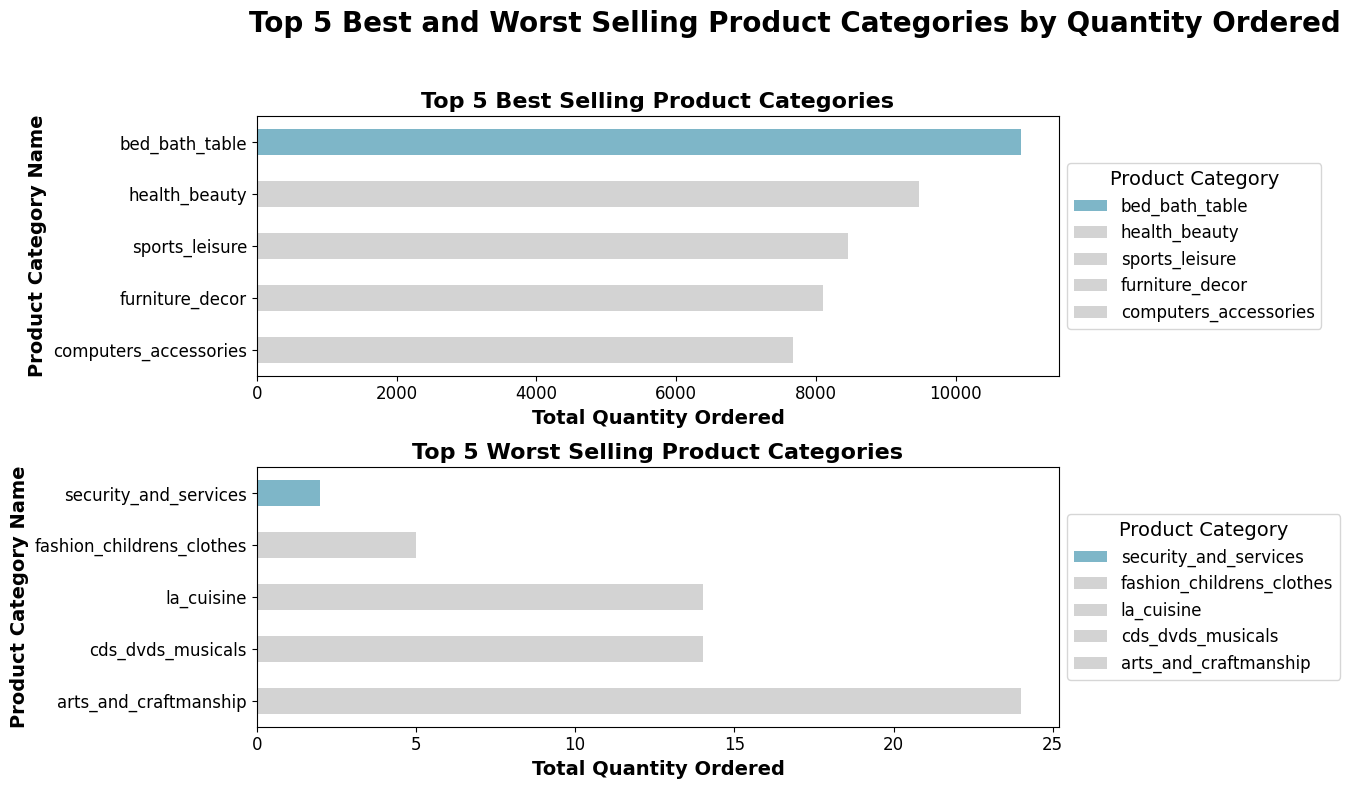

In [113]:
products_visualization = all_df.groupby('product_category_name_english')['qty_order'].sum().reset_index()
bottom = products_visualization.sort_values(by='qty_order', ascending=True).head(5)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,8))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Top 5 product categories by quantity ordered
sns.barplot(x='qty_order', y='product_category_name_english', 
            data=products_visualization.sort_values(by='qty_order', ascending=False).head(5), 
            hue='product_category_name_english', palette=colors, ax=ax[0], dodge=False, width=0.5)

ax[0].set_xlabel('Total Quantity Ordered', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Product Category Name', fontsize=14, fontweight='bold')
ax[0].set_title('Top 5 Best Selling Product Categories', loc='center', fontsize=16, fontweight='bold')
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].legend(title='Product Category', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14)

# Bottom 5 product categories by quantity ordered
sns.barplot(x='qty_order', y='product_category_name_english', 
            data=bottom.head(5), 
            hue='product_category_name_english', palette=colors, ax=ax[1], dodge=False, width=0.5)

ax[1].set_xlabel('Total Quantity Ordered', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Product Category Name', fontsize=14, fontweight='bold')
ax[1].set_title('Top 5 Worst Selling Product Categories', loc='center', fontsize=16, fontweight='bold')
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)
ax[1].legend(title='Product Category', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, title_fontsize=14)

plt.suptitle('Top 5 Best and Worst Selling Product Categories by Quantity Ordered', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()


**Top 5 Best Selling Product Categories:**
- The bed_bath_table category leads as the top-selling product, with a significantly higher quantity sold compared to other categories.
- The other top categories—health_beauty, sports_leisure, furniture_decor, and computers_accessories—also demonstrate strong sales, but they lag behind bed_bath_table in total quantity ordered.

**Top 5 Worst Selling Product Categories:**
- The security_and_services category has the lowest quantity of products sold, followed by fashion_childrens_clothes, la_cuisine, cds_dvds_musicals, and arts_and_craftmanship, which also show very low sales volumes.
- The gap between the top and bottom categories is vast, showing that certain product categories perform much better in terms of sales compared to others, with bottom categories barely registering significant sales.

### Question 2: What are the monthly sales trends, and how have they evolved over time?

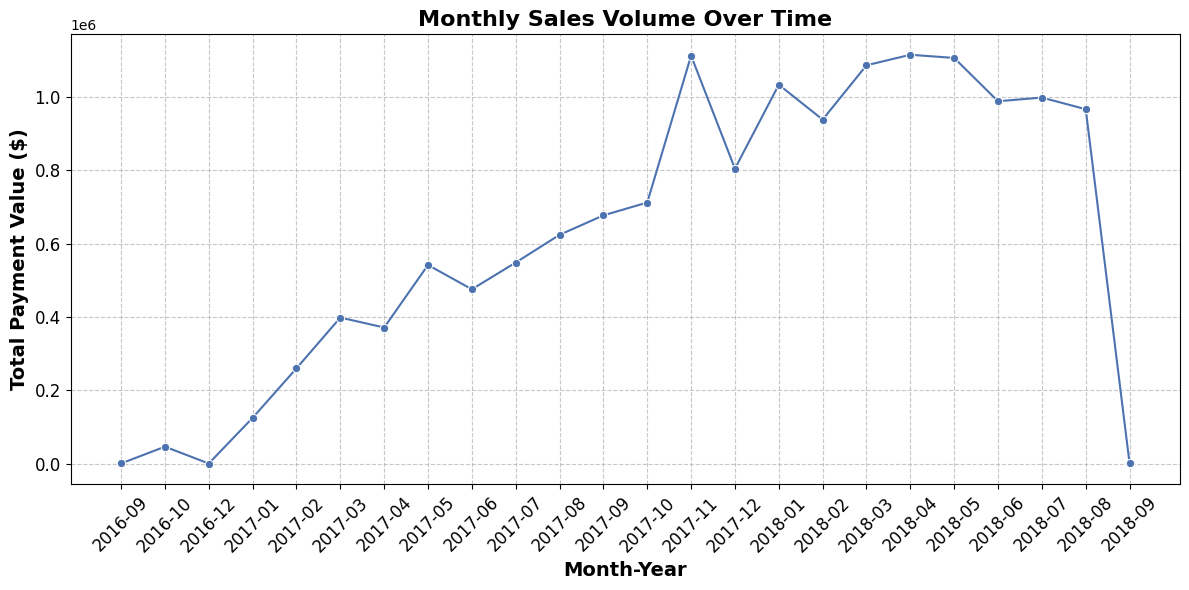

In [114]:
monthly_sales = all_df.groupby('month_year')['payment_value'].sum().reset_index()

fig = plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x="month_year", y="payment_value", marker="o", linestyle="-", color='#4C72B0')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Total Payment Value ($)", fontsize=14, fontweight='bold')
plt.xlabel("Month-Year", fontsize=14, fontweight='bold')
plt.title("Monthly Sales Volume Over Time", fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Based on the chart, the following conclusions can be drawn:
1. The timeline in the chart starts from September 2016 and ends in September 2018.
2. There are noticeable increases in sales in the months of October 2016, January 2017, February 2017, March 2017, May 2017, July 2017, August 2017, September 2017, October 2017, November 2017, January 2018, March 2018, April 2018, and July 2018.
3. There are decreases in sales during December 2016, April 2017, June 2017, December 2017, February 2018, May 2018, June 2018, August 2018, and September 2018.
4. A significant spike occurred in November 2017, along with a consistent upward trend from January 2017 to March 2017.
5. A drastic drop in sales is seen in September 2018, which could be due to incomplete data processing or ongoing record updates for that month.

This indicates general growth in sales over time, with fluctuations possibly related to seasonality or data completion issues for September 2018.

### Question 3: The RFM (Recency, Frequency, Monetary) analysis



In [115]:
now = all_df['order_purchase_timestamp'].max()
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp':lambda x: (now - x.max()).days,
    'order_id': 'count',
    'payment_value':'sum'
})
rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']
rfm_df.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,292,1,114.74
1,000161a058600d5901f007fab4c27140,413,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,551,1,195.42
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35
4,000379cdec625522490c315e70c7a9fb,153,1,107.01


Because the customer IDs are quite long, we will replace them with numeric IDs. This change does not have any impact, as we are only interested in seeing when the last transaction occurred, how frequently the customer makes purchases, and the total revenue generated by each customer.

In [116]:
rfm_df['numeric_id'] = pd.factorize(rfm_df['customer_id'])[0] + 1
rfm_df.head()

,customer_id,recency,frequency,monetary,numeric_id
0,00012a2ce6f8dcda20d059ce98491703,292,1,114.74,1
1,000161a058600d5901f007fab4c27140,413,1,67.41,2
2,0001fd6190edaaf884bcaf3d49edf079,551,1,195.42,3
3,0002414f95344307404f0ace7a26f1d5,382,1,179.35,4
4,000379cdec625522490c315e70c7a9fb,153,1,107.01,5


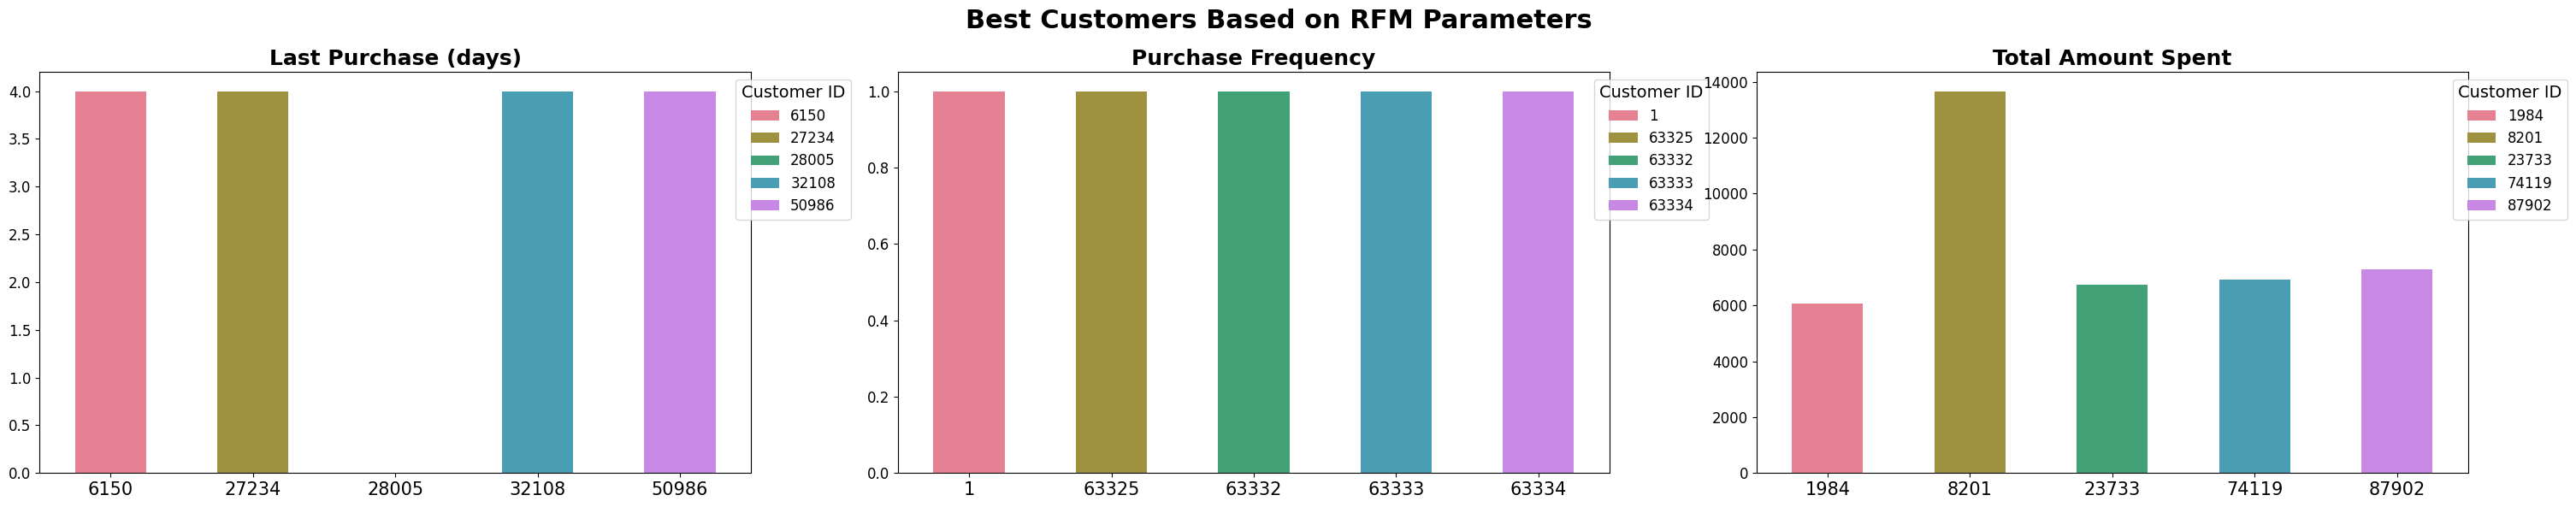

In [117]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,6))
colors = sns.color_palette("husl", 5)

# Bar plot for Recency (Last Purchase)
sns.barplot(y="recency", x='numeric_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), hue='numeric_id', palette=colors, ax=ax[0], dodge=False, width=0.5)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('Last Purchase (days)', loc='center', fontsize=18, fontweight='bold')
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].legend(title='Customer ID', fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))

# Bar plot for Frequency (Number of Purchases)
sns.barplot(y='frequency', x='numeric_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), hue='numeric_id', palette=colors, ax=ax[1], dodge=False, width=0.5)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('Purchase Frequency', loc='center', fontsize=18, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].legend(title='Customer ID', fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))

# Bar plot for Monetary (Total Money Spent)
sns.barplot(y='monetary', x='numeric_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(5), hue='numeric_id', palette=colors, ax=ax[2], dodge=False, width=0.5)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('Total Amount Spent', loc='center', fontsize=18, fontweight='bold')
ax[2].tick_params(axis='x', labelsize=15)
ax[2].tick_params(axis='y', labelsize=12)
ax[2].legend(title='Customer ID', fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1.15, 1))

plt.suptitle('Best Customers Based on RFM Parameters', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.show()


Based on the data visualization above, the following conclusions can be drawn:
1. **Recency (Last Purchase)**: Some customers have made transactions within the last 0 to 4 days, with the most recent transaction made by the customer with ID `28005`.
2. **Frequency (Purchase Frequency)**: Most customers have made purchases once in the last few months, indicating relatively infrequent purchase patterns.
3. **Monetary (Total Amount Spent)**: The amount of money spent by customers varies. The customer with ID `8201` has spent the most, showing significant financial involvement compared to other customers.

From the three RFM parameters, the top customers who are the most active and spend the most can be identified within the analyzed period.

### Question 4: Which states have the highest and lowest total sales, and what regional patterns can be identified?

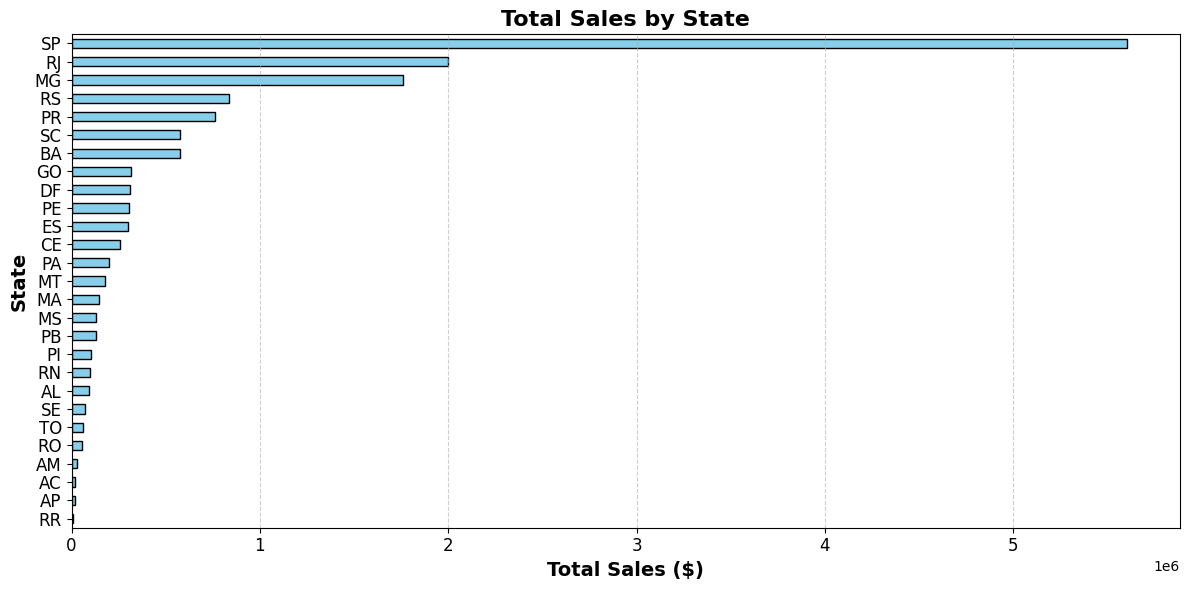

In [118]:
sales_by_state = all_df.groupby('customer_state')['payment_value'].sum().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
sales_by_state.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Total Sales by State', fontsize=16, fontweight='bold')
plt.ylabel('State', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales ($)', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6, axis='x')
plt.tight_layout()
plt.show()


Based on the total sales by state chart, it can be concluded that the state with the highest sales is São Paulo (SP), with a significant gap compared to other states. On the other hand, the states with the lowest sales are Roraima (RR), Amapá (AP), Acre (AC), and Amazonas (AM). This indicates an uneven distribution of sales, where larger or more developed states tend to have much higher sales volumes.

### Question 5: What is the relationship between product pricing, shipping costs, and customer review scores?

/var/folders/b9/pvmggz1d29v76kmwczpmh45c0000gn/T/ipykernel_38525/3501422009.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


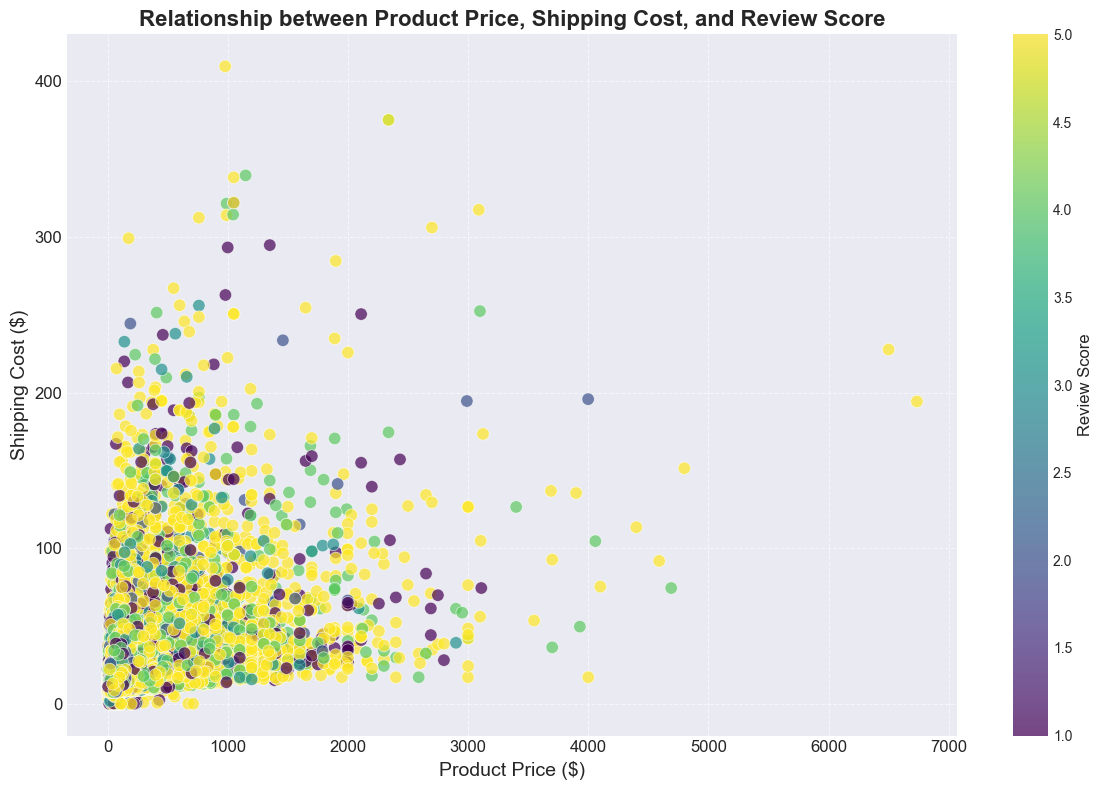

In [119]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
scatter = plt.scatter(all_df['price'], all_df['freight_value'], 
                      c=all_df['review_score'], cmap='viridis', s=80, alpha=0.7, edgecolor='w', linewidth=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Review Score', fontsize=12)
plt.xlabel('Product Price ($)', fontsize=14)
plt.ylabel('Shipping Cost ($)', fontsize=14)
plt.title('Relationship between Product Price, Shipping Cost, and Review Score', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Most products are in the lower range of price and shipping cost. However, higher-priced products tend to receive better review scores, even though their shipping costs are also higher. This suggests that other factors, such as quality, influence customers' purchasing decisions.

## Conclusion

1. **Which product categories have the highest and lowest sales volumes?**  
   The top-selling product categories are **bed_bath_table, health_beauty, sports_leisure, furniture_decor,** and **computers_accessories**. Conversely, the categories with the least sales are **security_and_services, fashion_childrens_clothes, la_cuisine, cds_dvds_musicals,** and **art_and_craftmanship**. This indicates that home-related and technology products are the most popular, while niche categories like arts and children's fashion have lower demand.

2. **What are the monthly sales trends, and how have they evolved over time?**  
   The analysis of monthly sales trends reveals key patterns:
   - The data spans from September 2016 to September 2018.
   - Significant sales increases occurred in months like October 2016, January to March 2017, May, July, and September 2017, as well as November 2017 and early 2018.
   - Declines were observed in December 2016, April, June, and December 2017, and sporadically in 2018.
   - November 2017 showed a substantial spike in sales, possibly driven by promotional events, followed by a consistent growth period in early 2017.
   - The sharp decline in September 2018 may be attributed to incomplete data collection at the time of analysis.

3. **RFM Analysis**:
   - **Recency**: Most customers made purchases within the last 0-4 days of the dataset, with the most recent transaction by customer ID 28005.
   - **Frequency**: The majority of customers have made only **one purchase** in recent months, indicating a large proportion of single-purchase behavior.
   - **Monetary**: Spending varies widely, but customer ID 8201 is the highest spender, showing a significant contribution to overall revenue.

4. **Which states have the highest and lowest total sales, and what regional patterns can be identified?**  
   From the geo-analysis, **Sao Paulo** stands out as the state with the highest sales by a significant margin, indicating a strong customer base in this region. On the other hand, **Roraima (RR), Amapa (AP), Acre (AC),** and **Amazonas (AM)** are the states with the lowest sales, suggesting potential opportunities for market expansion or targeted campaigns in these regions.

5. **What is the relationship between product pricing, shipping costs, and customer review scores?**  
   The clustering analysis shows that most products are within the lower price and shipping cost range. However, higher-priced products tend to receive better review scores, even though their shipping costs are also relatively high. This suggests that customers are willing to pay a premium for higher quality products, indicating that price alone is not a significant barrier when the perceived value and customer satisfaction are high.